In [74]:
import os
import pandas as pd
from torchvision.io import read_image
from torch.utils.data import Dataset
from torch import tensor

In [35]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [63]:
TAGS_LIST = ['guitar',
 'classical',
 'slow',
 'techno',
 'strings',
 'drums',
 'electronic',
 'rock',
 'fast',
 'piano',
 'ambient',
 'beat',
 'violin',
 'synth',
 'female',
 'indian',
 'opera',
 'quiet',
 'flute',
 'choir',
 'cello']

In [95]:
class CustomImageDataset(Dataset):
    def __init__(self, annotations_file, img_dir, spec_index, tags_list):
        self.img_labels = pd.read_csv(annotations_file)
        self.img_dir = img_dir
        self.spec_index = spec_index
        self.tags_list = tags_list


    def __len__(self):
        return len(self.img_labels)

    def __getitem__(self, idx):
        img_path = self.img_dir + self.img_labels.iloc[[idx]]["id"].to_string(index=False) + f"_{self.spec_index}.png"
        try:
          image = read_image(img_path)
        except RuntimeError:
          return self.__getitem__(idx+1)
        label = self.img_labels.iloc[idx][self.tags_list].tolist()
        return image, label



In [96]:
tags_path = "/content/drive/MyDrive/musicrecom/melodice/tagged_music_after_drop"
img_path = "/content/drive/MyDrive/musicrecom/spectrograms/"

dataset = CustomImageDataset(tags_path, img_path, 0, TAGS_LIST)

In [98]:
from torch.utils.data import DataLoader


train_dataloader = DataLoader(dataset, batch_size=64, shuffle=True)


Feature batch shape: torch.Size([64, 4, 480, 640])


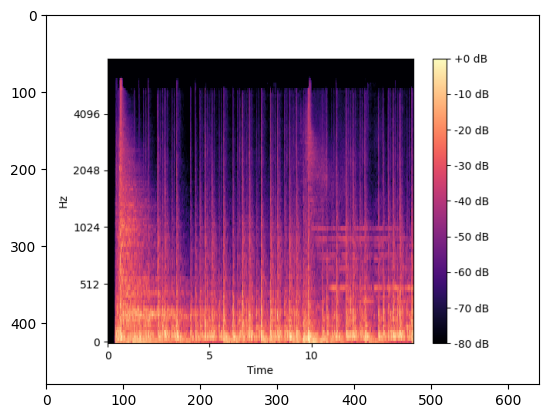

Label: tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0.,
        0., 0., 1., 0., 0., 0., 1., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 1., 1., 0., 0., 1., 0., 0., 0., 0., 1., 1., 0., 1., 0., 0.,
        0., 1., 0., 0., 1., 0., 1., 0., 0., 0.], dtype=torch.float64)


In [99]:
import matplotlib.pyplot as plt
# Display image and label.
train_features, train_labels = next(iter(train_dataloader))
print(f"Feature batch shape: {train_features.size()}")
# print(f"Labels batch shape: {train_labels.size()}")
img = train_features[0].squeeze()
label = train_labels[0]
plt.imshow(img.permute(1, 2, 0))

plt.show()
print(f"Label: {label}")

